#Term Project:

Primary objective of this script is to loads the movie reviews data set file and visualizes the data.

For Term project, chosen data set that is associated to Movies Metadata and performed Exploratory Data Analysis, Hidden insights based on available data in data sets, performed correlation analysis on movie reviews and visualize the same to display data graphs.

To mee the objective, below process steps are followed:

 #Data Collection

 #Data Cleaning

 #Data Exploratory Analysis

 #Data Modeling

#Data Visualization


Output displayed:

#Visualized and printed the charts to perform exploratory analysis. 

#Displayed Histogram and summarizing distribution of data from the movie reviews.

#Captured the average IMDB scores range of all movies.

#Displayed mean IMDB Scores vs Country of movie productions.

#Displayed the number of movies vs country of movie production

#Captured the most contributors of movies based on available data sets

#Displayed Mean_IMDB_Score Vs Rating by Motion Pictures Association

#Biased movies on country or origin basis as well as ratings affects the IMDB scores.

#Displayed Number of Movies Vs Rating by Motion Pictures Association

#Displayed Scatter plot Imdb_Score vs Duration of a Movie

#Overall time of a movie seems to be played a nominal role in deciding the score of a movie.

#A small trend indicated long movies having better review scores.

#Displayed Scatter plot Imdb_Score vs Budget of a Movie

#Captured Outlier points and ranges of gross earnings of a movie.

#Applied filters and observed the scale down.

#Displayed Scatter plot Imdb_Score vs Budget of a Movie After Filters

#Displayed Scatter plot Imdb_Score vs Gross collection of a Movie


Author: Rajasekharreddy Karna


Date: 02/25/2021


In [1]:
# Importing required Library files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset to read from same working directory the .ipynb file exist
movie_data=pd.read_csv("movie_metadata.csv",low_memory="False")

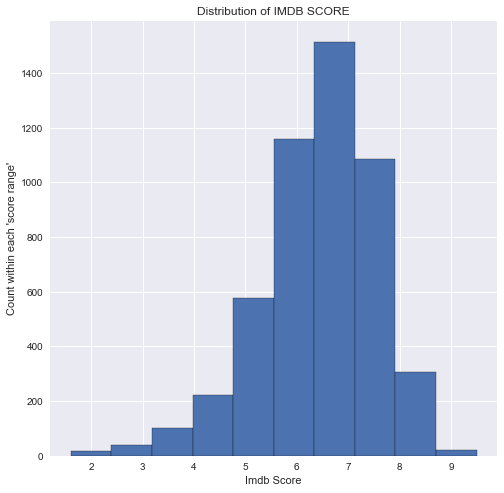

In [3]:
# Displaying Histogram of movie reviews
imdb_score=(movie_data['imdb_score']).tolist()
plt.figure(figsize=(8,8))
plt.hist(imdb_score,edgecolor='black')
plt.xlabel("Imdb Score")
plt.ylabel("Count within each 'score range'")
plt.title("Distribution of IMDB SCORE")
plt.show()

#### Few observations from the above chart are as follows:
* The dataset seems to be fairly distributed although it does not contain equal information on all score ranges. 
* As can be seen most of the scores are ranged in the [5. 8] range.
* This might bias the results of some low-end algorithms.

## We will be visualizing some important charts and perform exploratory analysis.

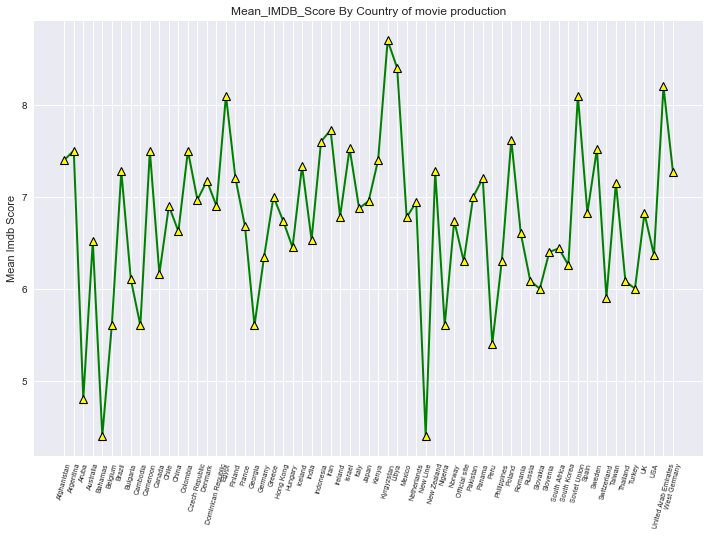

In [4]:
# Displaying Mean IMDB Score Vs Country of movie production
mean_score_by_country=movie_data.groupby('country')['imdb_score'].mean()
mean_score_by_country=mean_score_by_country.reset_index()
xticks=mean_score_by_country['country'].tolist()
xvalues=list(range(1,len(xticks)+1))
yvalues=mean_score_by_country['imdb_score'].tolist()
plt.figure(figsize=(12,8))
plt.xticks(xvalues,xticks,rotation=75,fontsize=7)
plt.plot(xvalues,yvalues,color="green",marker="^",markersize=8,markerfacecolor="yellow",markeredgecolor="black",markeredgewidth=1.1,linewidth=2)
plt.ylabel("Mean Imdb Score")
plt.title("Mean_IMDB_Score By Country of movie production")
plt.show()

> At first sight, it seems that the main target variable "IMDB_Score" is fairly distributed among countries but that is not at all true and can be explained by the next graph.

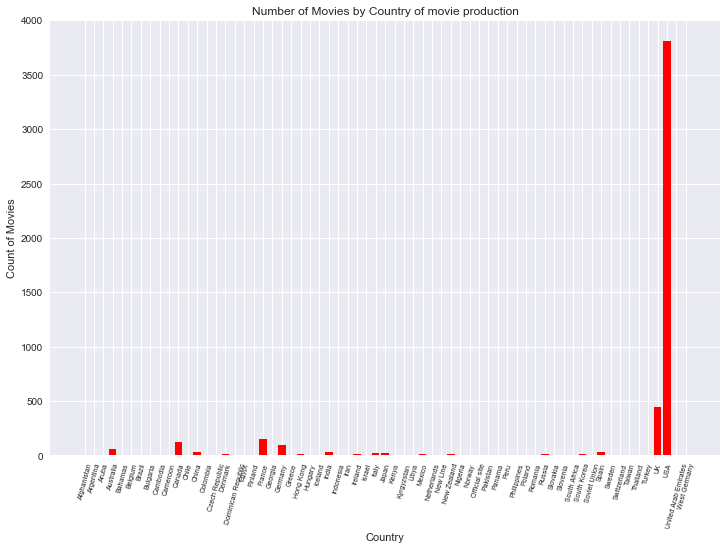

In [5]:
# Displaying Number of Movies Vs Country of movie production
count_by_country=movie_data.groupby('country')['imdb_score'].count()
count_by_country=count_by_country.reset_index()
xticks=count_by_country['country'].tolist()
xvalues=list(range(1,len(xticks)+1))
yvalues=count_by_country['imdb_score'].tolist()
plt.figure(figsize=(12,8))
plt.xticks(xvalues,xticks,rotation=75,fontsize=7)
plt.bar(xvalues,yvalues,color="red")
plt.xlabel("Country")
plt.ylabel("Count of Movies")
plt.title("Number of Movies by Country of movie production")
plt.show()

#### Clearly, it can be seen that USA and UK are the most contributors of movies and hence the scores within this dataset. This makes the dataset heavily biased on country of movie origin.

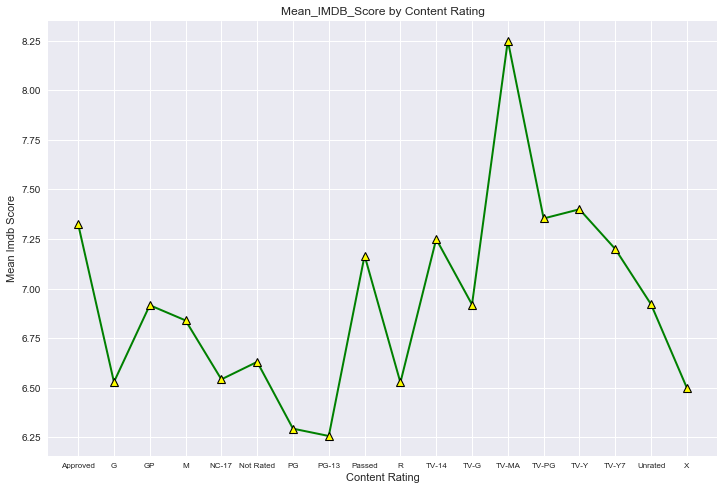

In [6]:
# Displaying Mean_IMDB_Score Vs Rating by Motion Pictures Assosciation
mean_score_by_content_rating=movie_data.groupby('content_rating')['imdb_score'].mean()
mean_score_by_content_rating=mean_score_by_content_rating.reset_index()
xticks=mean_score_by_content_rating['content_rating'].tolist()
xvalues=list(range(1,len(xticks)+1))
yvalues=mean_score_by_content_rating['imdb_score'].tolist()
plt.figure(figsize=(12,8))
plt.xticks(xvalues,xticks,fontsize=8)
plt.plot(xvalues,yvalues,color="green",marker="^",markersize=8,markerfacecolor="yellow",markeredgecolor="black",markeredgewidth=1.1,linewidth=2)
plt.xlabel("Content Rating")
plt.ylabel("Mean Imdb Score")
plt.title("Mean_IMDB_Score by Content Rating")
plt.show()

It is interesting to see how the rating affects the score but just as in the previous case the country or origin was biased, this aspect is also fairly biased. Also, it has too many cases to be incorporated in our analysis even after applying encoding.

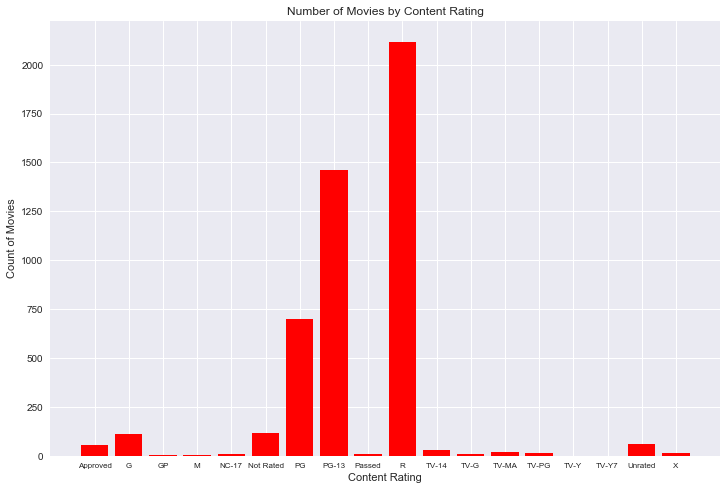

In [7]:
# Displaying Number of Movies Vs Rating by Motion Pictures Assosciation
count_by_content_rating=movie_data.groupby('content_rating')['imdb_score'].count()
count_by_content_rating=count_by_content_rating.reset_index()
xticks=count_by_content_rating['content_rating'].tolist()
xvalues=list(range(1,len(xticks)+1))
yvalues=count_by_content_rating['imdb_score'].tolist()
plt.figure(figsize=(12,8))
plt.xticks(xvalues,xticks,fontsize=8)
plt.bar(xvalues,yvalues,color="red")
plt.xlabel("Content Rating")
plt.ylabel("Count of Movies")
plt.title("Number of Movies by Content Rating")
plt.show()

As mentioned earlier, we can see the actual ratings which actively contribute to the dataset.

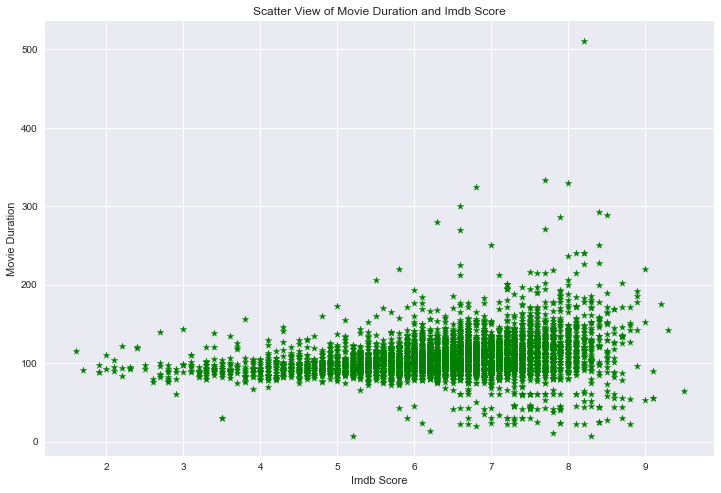

In [8]:
# Displaying Scatter plot Imdb_Score vs Duration of a Movie
duration=(movie_data['duration']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(time,score) for (time,score) in zip(duration,imdb_score) if ((pd.isnull(time) is False) and (pd.isnull(score) is False))]
non_null_duration=[time for (time,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (time,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_duration,marker="*",color="green")
plt.xlabel("Imdb Score")
plt.ylabel("Movie Duration")
plt.title("Scatter View of Movie Duration and Imdb Score")
plt.show()

#### Few Points can be observed as follows:
* Overall time of a movie seems to be playing a nominal role in deciding the score of a movie.
* A small trend indicates long movies having better review scores.

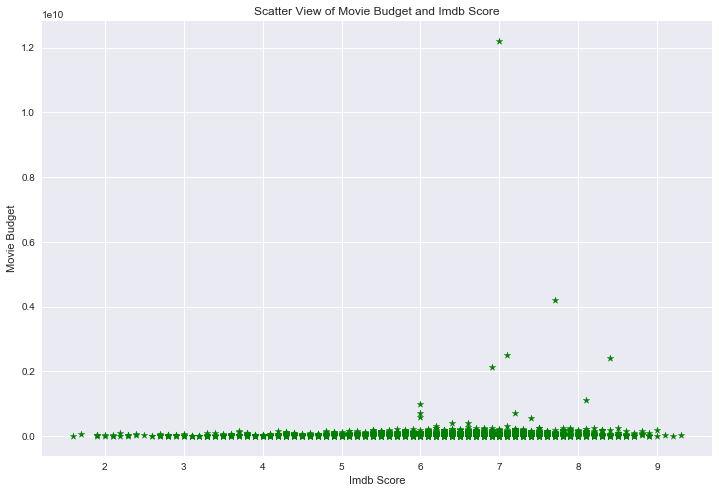

In [9]:
# Displaying Scatter plot Imdb_Score vs Budget of a Movie
budget=(movie_data['budget']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(spend,score) for (spend,score) in zip(budget,imdb_score) if ((pd.isnull(spend) is False) and (pd.isnull(score) is False))]
non_null_budget=[spend for (spend,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (spend,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_budget,marker="*",color="green")
plt.xlabel("Imdb Score")
plt.ylabel("Movie Budget")
plt.title("Scatter View of Movie Budget and Imdb Score")
plt.show()

>Few data points are acting as outliers and they are in the range of gross earnings of a movie where as this graph is about the budget.

Lets scale down, filter and observe.

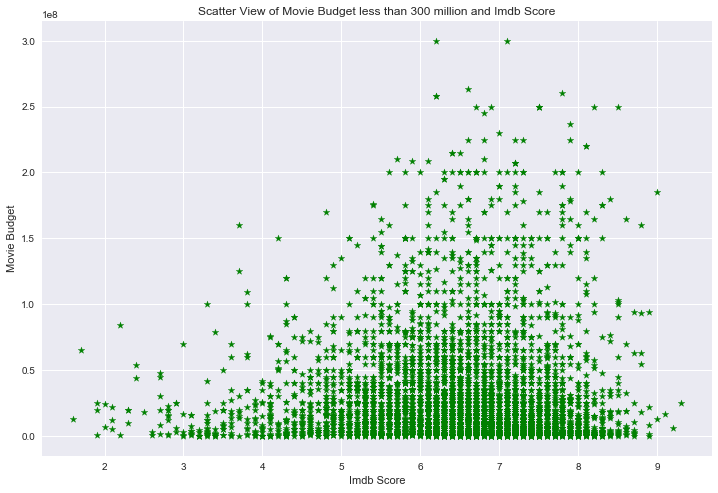

In [10]:
# Displaying Scatter plot Imdb_Score vs Budget of a Movie After Filtering
budget=(movie_data['budget']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(spend,score) for (spend,score) in zip(budget,imdb_score) if ((pd.isnull(spend) is False) and (pd.isnull(score) is False) and spend<=(3*(10**8)))]
non_null_budget=[spend for (spend,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (spend,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_budget,marker="*",color="green")
plt.xlabel("Imdb Score")
plt.ylabel("Movie Budget")
plt.title("Scatter View of Movie Budget less than 300 million and Imdb Score")
plt.show()

### From the figure we can see that:
* There exists a fair trend and in a way movie scores are being impacted by the budget invested in them.
* Also, since it is a continuous feature, it hold great potential in acting as a predictor in our models.

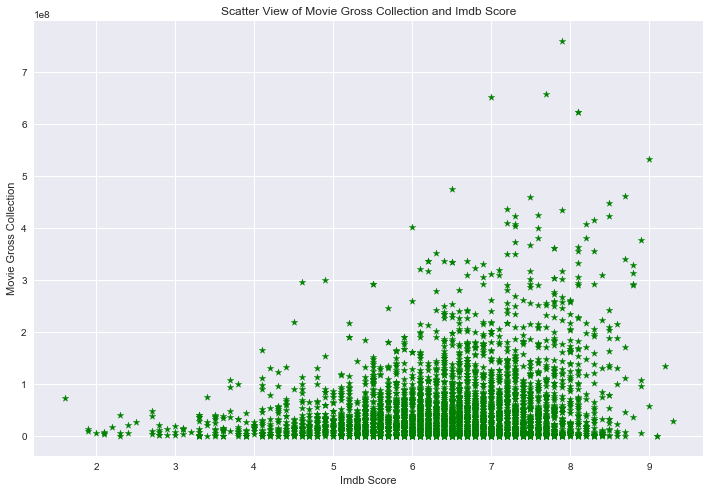

In [11]:
# Displaying Scatter plot Imdb_Score vs Gross collection of a Movie
gross=(movie_data['gross']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(income,score) for (income,score) in zip(gross,imdb_score) if ((pd.isnull(income) is False) and (pd.isnull(score) is False))]
non_null_gross=[income for (income,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (income,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_gross,marker="*",color="green")
plt.xlabel("Imdb Score")
plt.ylabel("Movie Gross Collection")
plt.title("Scatter View of Movie Gross Collection and Imdb Score")
plt.show()

### From the figure we can see that:
* There exists a fair trend and in a way movie scores are being impacted by the gross earning of the movie.
* There will be caveats for incorporating this in our predictor variables which will be explained during analysis.

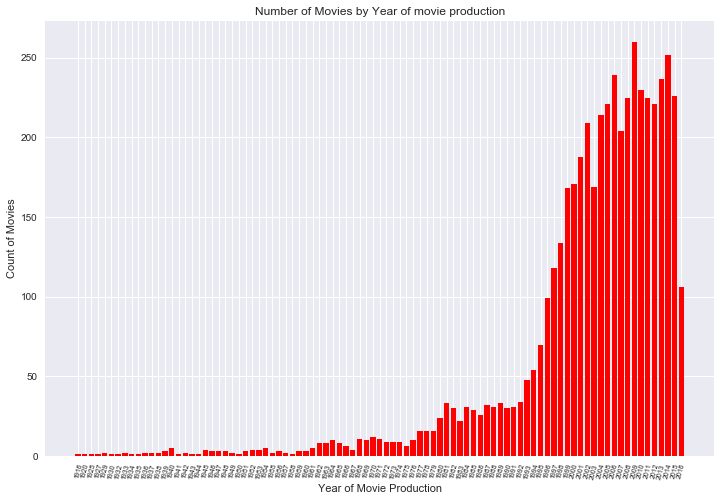

In [12]:
# Displaying Number of Movies Vs Year of movie production
count_by_year=movie_data.groupby('title_year')['imdb_score'].count()
count_by_year=count_by_year.reset_index()
xticks=count_by_year['title_year'].tolist()
xticks=[str(val) for val in xticks]
xticks=[val[:-2] for val in xticks]
xvalues=list(range(1,len(xticks)+1))
yvalues=count_by_year['imdb_score'].tolist()
plt.figure(figsize=(12,8))
plt.xticks(xvalues,xticks,rotation=75,fontsize=7)
plt.bar(xvalues,yvalues,color="red")
plt.xlabel("Year of Movie Production")
plt.ylabel("Count of Movies")
plt.title("Number of Movies by Year of movie production")
plt.show()

Clearly, we can see that as the Year progresses, more number of movies are generated. It is quite understandable as the technological advancements would have made it easier to produce more movies.

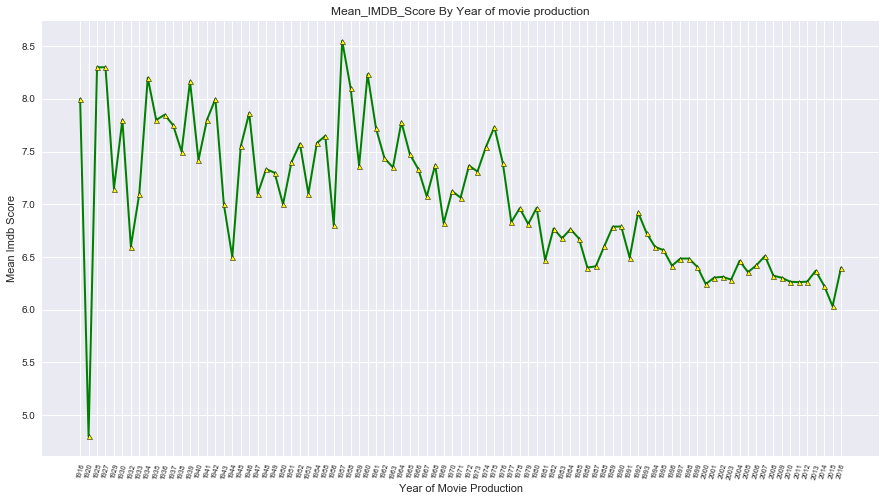

In [13]:
# Displaying Mean IMDB Score Vs Year of movie production
mean_score_by_year=movie_data.groupby('title_year')['imdb_score'].mean()
mean_score_by_year=mean_score_by_year.reset_index()
xticks=mean_score_by_year['title_year'].tolist()
xticks=[str(val) for val in xticks]
xticks=[val[:-2] for val in xticks]
xvalues=list(range(1,len(xticks)+1))
yvalues=mean_score_by_year['imdb_score'].tolist()
plt.figure(figsize=(15,8))
plt.xticks(xvalues,xticks,rotation=75,fontsize=7)
plt.plot(xvalues,yvalues,color="green",marker="^",markersize=5,markerfacecolor="yellow",markeredgecolor="black",markeredgewidth=0.5,linewidth=2)
plt.xlabel("Year of Movie Production")
plt.ylabel("Mean Imdb Score")
plt.title("Mean_IMDB_Score By Year of movie production")
plt.show()

However, the general trend of imdb scores is showing a slowly reducing one as the years progress. **Interesting !!**

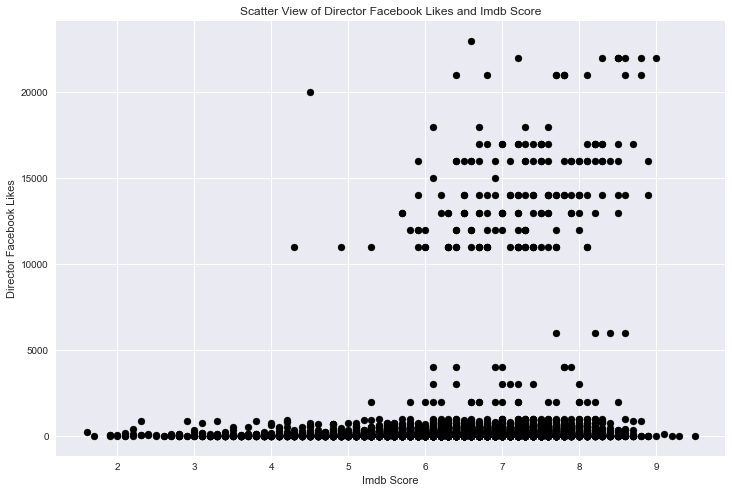

In [14]:
# Displaying Scatter plot Imdb_Score vs Director Facebook Likes
director_likes=(movie_data['director_facebook_likes']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(likes,score) for (likes,score) in zip(director_likes,imdb_score) if ((pd.isnull(likes) is False) and (pd.isnull(score) is False))]
non_null_director_likes=[likes for (likes,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (likes,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_director_likes,marker="o",color="black")
plt.xlabel("Imdb Score")
plt.ylabel("Director Facebook Likes")
plt.title("Scatter View of Director Facebook Likes and Imdb Score")
plt.show()

A director is obviously a main sought out character to judge the quality of a movie. Clearly a popular and good director will be able to generate better quality movies which will result into better imdb scores.

* We can see that the movies with higher scores are having a good proportion of directors who are popular as judged by their facebook likes.

#### Just like the director, all actors popularity also will govern the movie rating score. Lets see how that looks like.

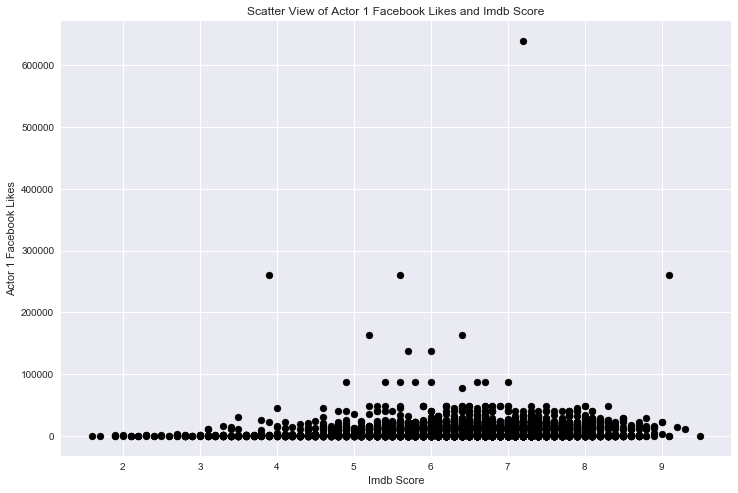

In [15]:
# Displaying Scatter plot Imdb_Score vs Actor 1 Facebook Likes
actor1_likes=(movie_data['actor_1_facebook_likes']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(likes,score) for (likes,score) in zip(actor1_likes,imdb_score) if ((pd.isnull(likes) is False) and (pd.isnull(score) is False))]
non_null_actor1_likes=[likes for (likes,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (likes,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_actor1_likes,marker="o",color="black")
plt.xlabel("Imdb Score")
plt.ylabel("Actor 1 Facebook Likes")
plt.title("Scatter View of Actor 1 Facebook Likes and Imdb Score")
plt.show()

This field seems to be fairly even along with few outliers. It can act as a good candidate for our predictions.

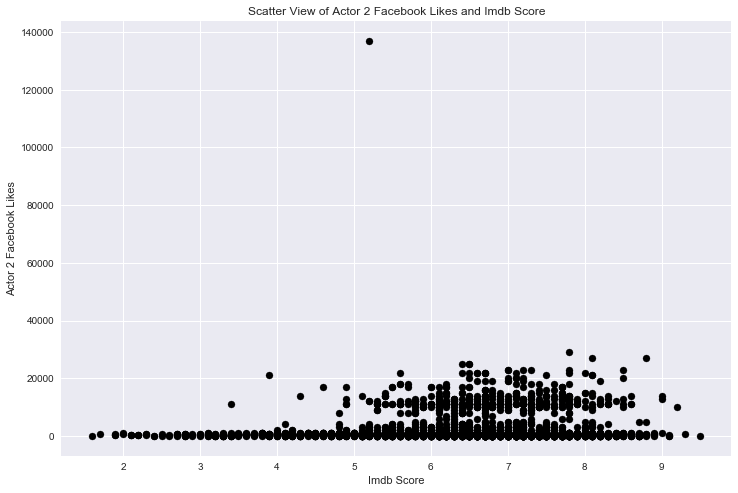

In [16]:
# Displaying Scatter plot Imdb_Score vs Actor 2 Facebook Likes
actor2_likes=(movie_data['actor_2_facebook_likes']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(likes,score) for (likes,score) in zip(actor2_likes,imdb_score) if ((pd.isnull(likes) is False) and (pd.isnull(score) is False))]
non_null_actor2_likes=[likes for (likes,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (likes,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_actor2_likes,marker="o",color="black")
plt.xlabel("Imdb Score")
plt.ylabel("Actor 2 Facebook Likes")
plt.title("Scatter View of Actor 2 Facebook Likes and Imdb Score")
plt.show()

We can see that actor popularity is indeed affecting movie ratings. We will be considering all actor rating in the analysis.

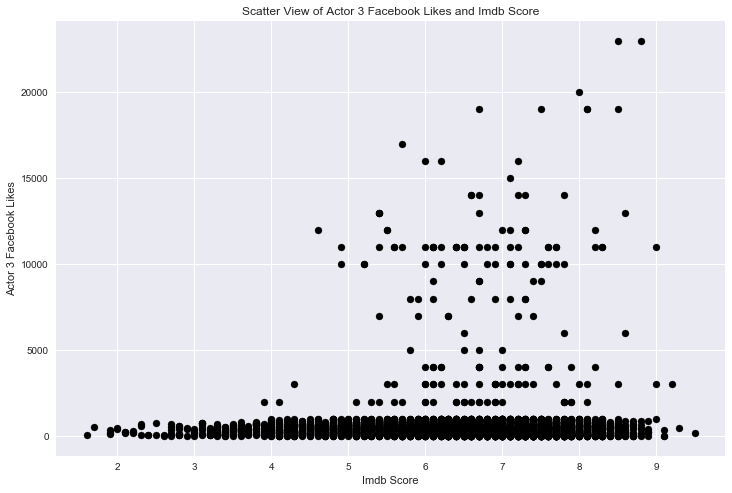

In [17]:
# Displaying Scatter plot Imdb_Score vs Actor 3 Facebook Likes
actor3_likes=(movie_data['actor_3_facebook_likes']).tolist()
imdb_score=(movie_data['imdb_score']).tolist()
list_of_non_null_pairs=[(likes,score) for (likes,score) in zip(actor3_likes,imdb_score) if ((pd.isnull(likes) is False) and (pd.isnull(score) is False))]
non_null_actor3_likes=[likes for (likes,score) in list_of_non_null_pairs]
non_null_imdb_score=[score for (likes,score) in list_of_non_null_pairs]
plt.figure(figsize=(12,8))
plt.scatter(non_null_imdb_score,non_null_actor3_likes,marker="o",color="black")
plt.xlabel("Imdb Score")
plt.ylabel("Actor 3 Facebook Likes")
plt.title("Scatter View of Actor 3 Facebook Likes and Imdb Score")
plt.show()

Another one to bolster our decision. Hope fully they are not correlated and there is no multicollinearity.

#### Well no need to hope, we will check the correlation plot soon.

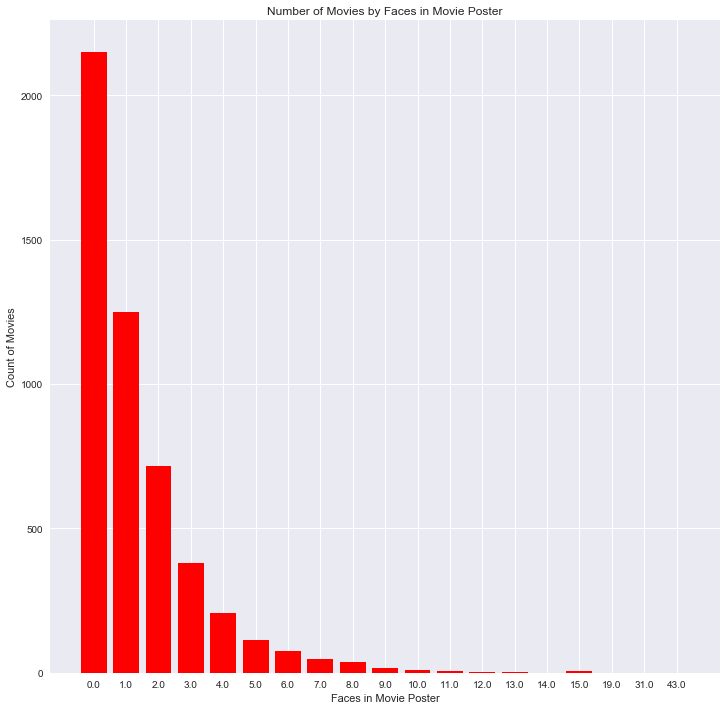

In [18]:
# Displaying Count of Movies Vs Number of Faces in Poster
mean_score_by_faces=movie_data.groupby('facenumber_in_poster')['imdb_score'].count()
mean_score_by_faces=mean_score_by_faces.reset_index()
xticks=mean_score_by_faces['facenumber_in_poster'].tolist()
xvalues=list(range(1,len(xticks)+1))
yvalues=mean_score_by_faces['imdb_score'].tolist()
plt.figure(figsize=(12,12))
plt.xticks(xvalues,xticks,fontsize=10)
plt.bar(xvalues,yvalues,color="red")
plt.xlabel("Faces in Movie Poster")
plt.ylabel("Count of Movies")
plt.title("Number of Movies by Faces in Movie Poster")
plt.show()


Most of the movies seem to have fewer faces in the movie poster and we saw from the first plot that most of the scores are in the [5,8] range. So most high rated movies would be having a relatively lower number of faces in their posters. This indicates some relationship and could be used as a predictor variable.

### Correlation PLot

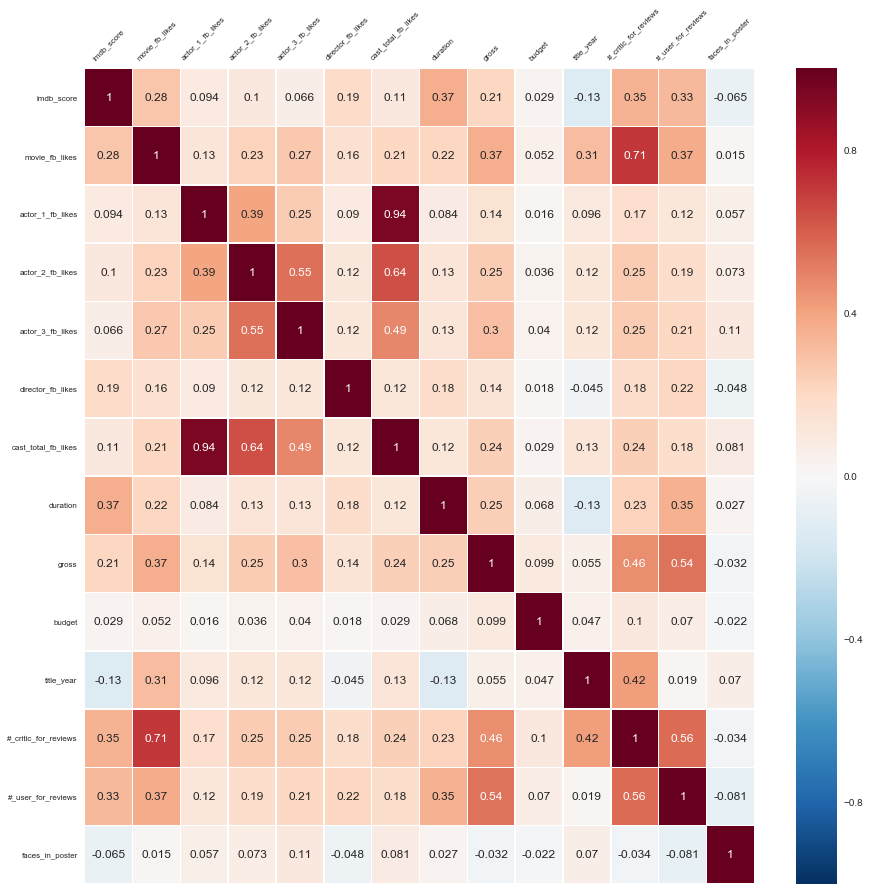

In [19]:
# Displaying Correlation Analysis Plot
movie_data=movie_data.dropna()
columns=["imdb_score","movie_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes",\
                        "director_facebook_likes","cast_total_facebook_likes","duration","gross","budget","title_year",\
                        "num_critic_for_reviews","num_user_for_reviews","facenumber_in_poster"]
continuous_data=movie_data[columns]
labels=["imdb_score","movie_fb_likes","actor_1_fb_likes","actor_2_fb_likes","actor_3_fb_likes",\
                        "director_fb_likes","cast_total_fb_likes","duration","gross","budget","title_year",\
                        "#_critic_for_reviews","#_user_for_reviews","faces_in_poster"]
corr=continuous_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,xticklabels=labels,yticklabels=labels,annot=True,linewidth=0.5)
plt.gca().xaxis.tick_top()
plt.yticks(rotation=0,fontsize=8)
plt.xticks(rotation=45,fontsize=8)
plt.show()

On seeing this, we can easily short list the candidate predictor variables.

> ##### Note: not all variables from the candidate set will be used for reasons which will be discussed in analysis.

We are choosing the following after careful analysis:
* "movie_fb_likes"
* "actor_1_fb_likes"
* "actor_2_fb_likes"
* "actor_3_fb_likes"
* "director_fb_likes"
* "duration"
* "gross"
* "budget"
* "title_year"
* "faces_in_poster"

## This concludes the Exploratory Data Analysis and Visualization.